In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,201401010020,2014,1,1,NaN,0,NaN,92,India,6,...,NaN,"""Bomb blasts rock Manipur,"" The Sentinel, Janu...","""India: 2 IED Explosions Occur in Imphal West ...","""Bomb explosions in Imphal, police investigati...",START Primary Collection,-9,-9,0,-9,NaN
1,201401010021,2014,1,1,NaN,0,NaN,92,India,6,...,NaN,"""Bomb blasts rock Manipur,"" The Sentinel, Janu...","""India: 2 IED Explosions Occur in Imphal West ...","""Bomb explosions in Imphal, police investigati...",START Primary Collection,-9,-9,0,-9,NaN
2,201401010052,2014,1,1,NaN,0,NaN,92,India,6,...,NaN,"""Sarpanch beaten to death near Samalkha in Har...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
3,201401010061,2014,1,1,NaN,0,NaN,92,India,6,...,NaN,"""Priest killed by Maoists in Odisha,"" Business...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
4,201401010062,2014,1,1,NaN,0,NaN,92,India,6,...,NaN,"""Naxals kill police jawan in Chhattisgarh,"" Th...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [11]:
state = df.iloc[:,11]
state.head()

0         Manipur
1         Manipur
2         Haryana
3          Odisha
4    Chhattisgarh
Name: provstate, dtype: object

In [20]:
state.values

array(['Manipur', 'Manipur', 'Haryana', ..., 'Jammu and Kashmir', 'Assam',
       'Manipur'], dtype=object)

<BarContainer object of 3735 artists>

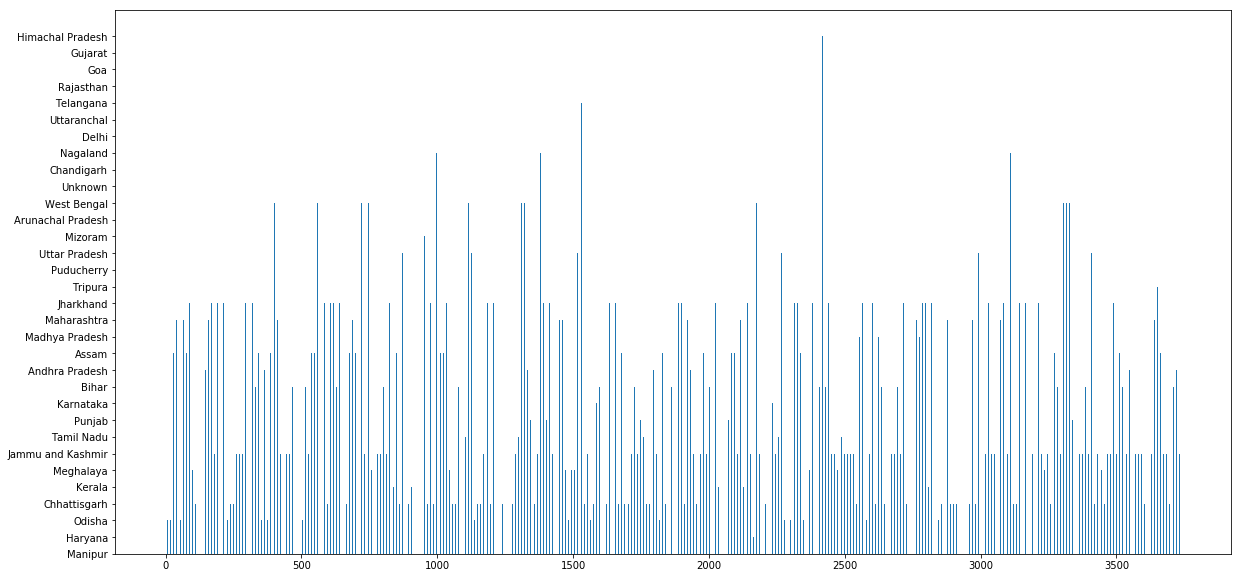

In [123]:
keys, counts = np.unique(state.values, return_counts=True)
plt.figure(figsize=(20, 10))

plt.bar(range(len(state)), state.values, align='edge', width=0.3)

# plt.bar(keys, counts)
# plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')


In [38]:
unique_state=np.array(np.unique(state.values, return_counts=True)).T

In [45]:
c = dict(zip(keys, counts))


<BarContainer object of 32 artists>

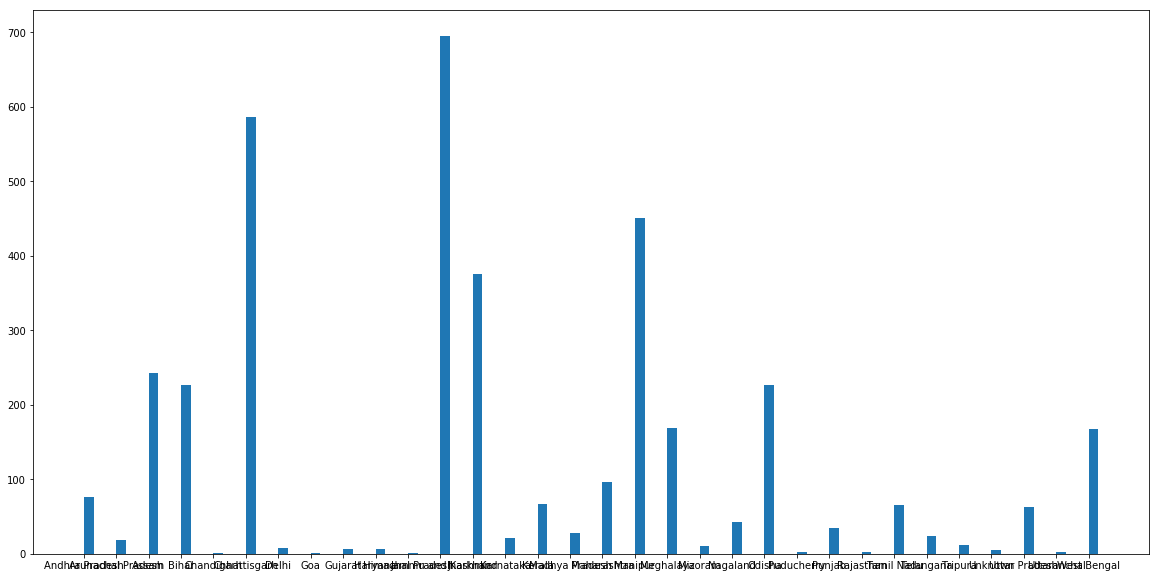

In [48]:
plt.figure(figsize=(20, 10))

plt.bar(c.keys(), c.values(), align='edge', width=0.3)

In [49]:
c

{'Andhra Pradesh': 76,
 'Arunachal Pradesh': 19,
 'Assam': 243,
 'Bihar': 227,
 'Chandigarh': 1,
 'Chhattisgarh': 586,
 'Delhi': 8,
 'Goa': 1,
 'Gujarat': 6,
 'Haryana': 6,
 'Himachal Pradesh': 1,
 'Jammu and Kashmir': 695,
 'Jharkhand': 376,
 'Karnataka': 21,
 'Kerala': 67,
 'Madhya Pradesh': 28,
 'Maharashtra': 96,
 'Manipur': 451,
 'Meghalaya': 169,
 'Mizoram': 10,
 'Nagaland': 43,
 'Odisha': 226,
 'Puducherry': 2,
 'Punjab': 35,
 'Rajasthan': 3,
 'Tamil Nadu': 66,
 'Telangana': 24,
 'Tripura': 12,
 'Unknown': 5,
 'Uttar Pradesh': 63,
 'Uttaranchal': 2,
 'West Bengal': 167}

In [66]:
sort=tuple(reversed(sorted(c.items(), key=lambda x: x[1])))

In [73]:
sort=sort[0 : 10]

In [74]:
sorted_dict=dict((x,y) for x, y in sort)

In [75]:
sorted_dict

{'Jammu and Kashmir': 695,
 'Chhattisgarh': 586,
 'Manipur': 451,
 'Jharkhand': 376,
 'Assam': 243,
 'Bihar': 227,
 'Odisha': 226,
 'Meghalaya': 169,
 'West Bengal': 167,
 'Maharashtra': 96}

<BarContainer object of 10 artists>

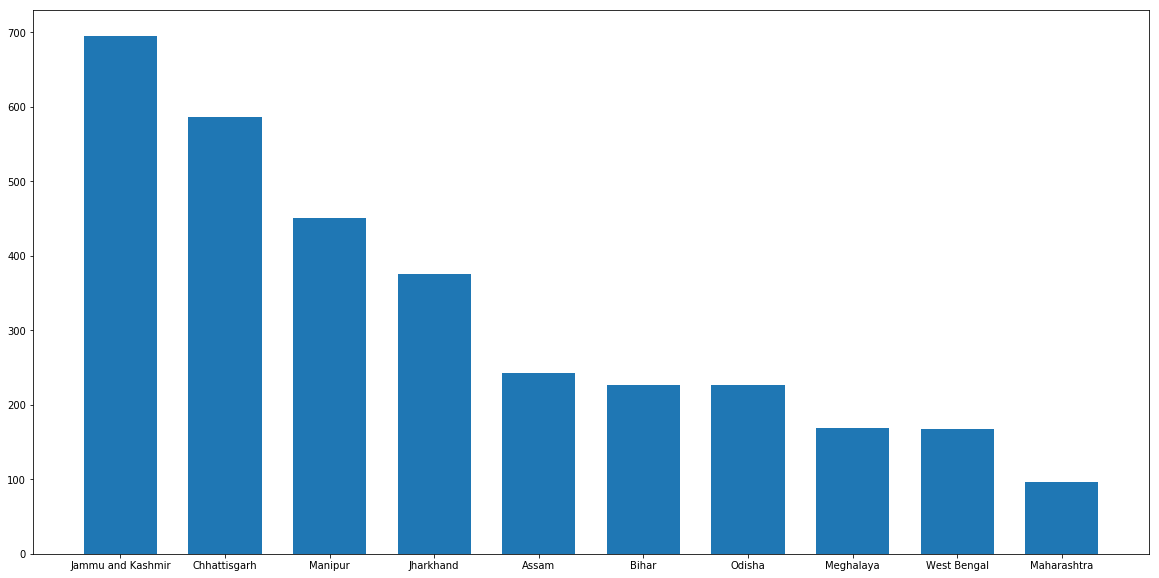

In [95]:
plt.figure(figsize=(20, 10))

plt.bar(sorted_dict.keys(), sorted_dict.values(), align='center', width=0.7)

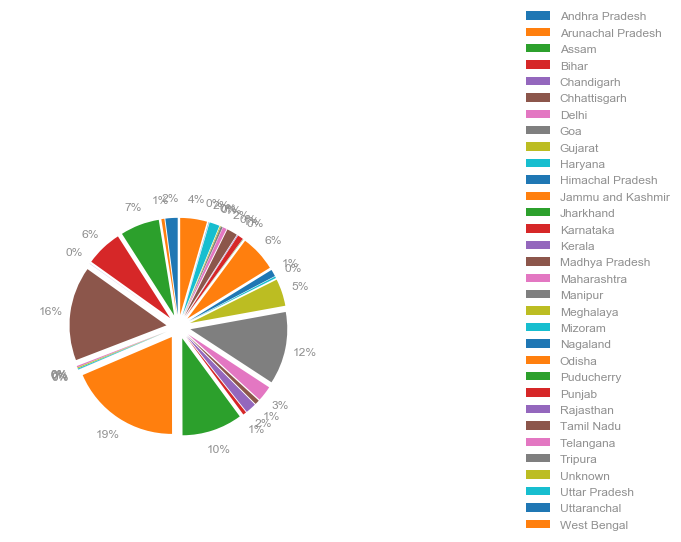

In [205]:
fig, ax = plt.subplots()

explode = (0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5)

mypie=ax.pie(counts, radius=4,explode=explode, autopct='%1.0f%%', startangle=90, pctdistance=1.2,labeldistance=1.9)



# ax.set_title("State Wise")
ax.axis('equal')
ax.legend(frameon=False, labels=keys, bbox_to_anchor=(2,2))
plt.margins(0,0)
# show it
plt.show()

# year wise data analysis

In [193]:
year= df.iloc[:,1]
year.head()

0    2014
1    2014
2    2014
3    2014
4    2014
Name: iyear, dtype: int64

In [204]:
year_state=pd.DataFrame(data=dict(s1=state, s2=year), index=year.index)

In [214]:
dic={}
for i in year.unique():
    for j in state.values:
        if j+" "+str(i) in dic.keys():
            dic[j+" "+str(i)]+=1
        else:
            dic[j+str(i)]=1
    
    

In [213]:
dic

{'Manipur2014': 1,
 'Haryana2014': 1,
 'Odisha2014': 1,
 'Chhattisgarh2014': 1,
 'Kerala2014': 1,
 'Meghalaya2014': 1,
 'Jammu and Kashmir2014': 1,
 'Tamil Nadu2014': 1,
 'Punjab2014': 1,
 'Karnataka2014': 1,
 'Bihar2014': 1,
 'Andhra Pradesh2014': 1,
 'Assam2014': 1,
 'Madhya Pradesh2014': 1,
 'Maharashtra2014': 1,
 'Jharkhand2014': 1,
 'Tripura2014': 1,
 'Puducherry2014': 1,
 'Uttar Pradesh2014': 1,
 'Mizoram2014': 1,
 'Arunachal Pradesh2014': 1,
 'West Bengal2014': 1,
 'Unknown2014': 1,
 'Chandigarh2014': 1,
 'Nagaland2014': 1,
 'Delhi2014': 1,
 'Uttaranchal2014': 1,
 'Telangana2014': 1,
 'Rajasthan2014': 1,
 'Goa2014': 1,
 'Gujarat2014': 1,
 'Himachal Pradesh2014': 1,
 'Manipur2015': 1,
 'Haryana2015': 1,
 'Odisha2015': 1,
 'Chhattisgarh2015': 1,
 'Kerala2015': 1,
 'Meghalaya2015': 1,
 'Jammu and Kashmir2015': 1,
 'Tamil Nadu2015': 1,
 'Punjab2015': 1,
 'Karnataka2015': 1,
 'Bihar2015': 1,
 'Andhra Pradesh2015': 1,
 'Assam2015': 1,
 'Madhya Pradesh2015': 1,
 'Maharashtra2015': 1,
 